### Digital Terrain Data processing

A digital model or 3D representation of a terrain's surface created from terrain elevation data.

- A DEM (Digital Elevation Model) Represents the bare-Earth surface, removing all natural and built features;
- A DSM (Digital Surface Model) captures both the natural and built/artificial features of the environment, as shown below;
- A DTM (Digital Terrain Model)  typically augments a DEM, by including vector features of the natural terrain, such as rivers and ridges. A DTM may be interpolated to generate a DEM, but not vice versa.

More about it at [here](https://gisgeography.com/free-global-dem-data-sources/)

👉 **Download [zoo.tif](https://www.dropbox.com/s/1w97ohqkcjgu2ku/zoo.tif?dl=0) and calculate [slope and aspect](https://stackoverflow.com/questions/47653271/calculating-aspect-slope-in-python3-x-matlab-gradientm-function) and generate a [hillshade visualization](https://matplotlib.org/gallery/specialty_plots/topographic_hillshading.html)**

In [9]:
from osgeo import gdal
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline 

Take a look at the DEM:

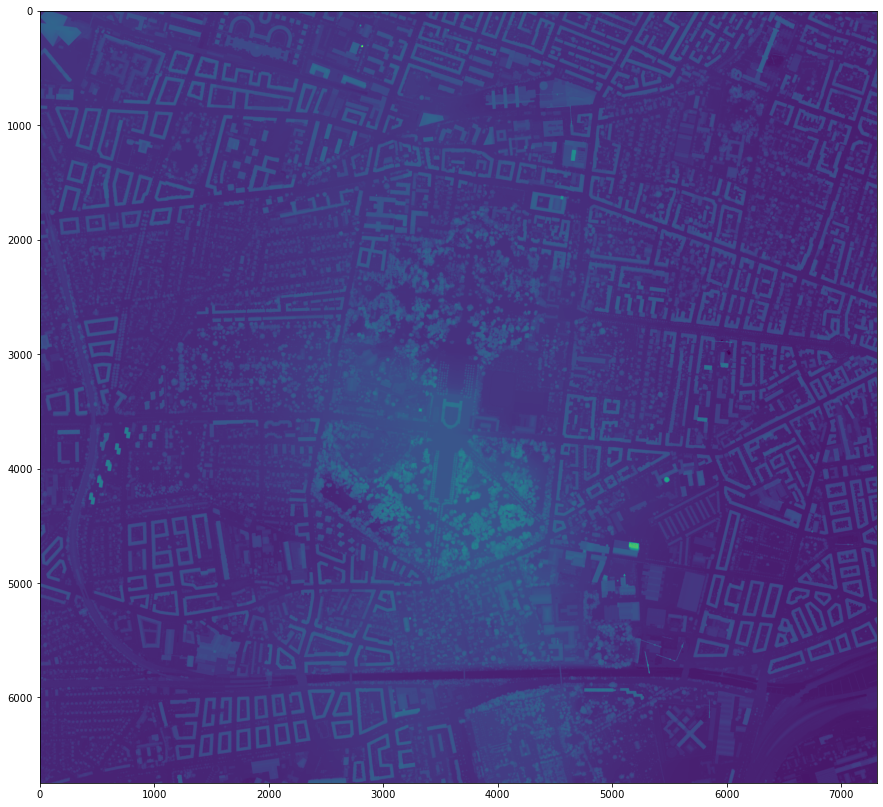

In [10]:
with rasterio.open('zoo.tif') as dataset:
    dem=dataset.read(1)
    plt.figure(figsize=(15, 15))
    imgplot = plt.imshow(dem)

The python binding for the [DEMprocessing](https://gdal.org/python/osgeo.gdal-module.html#DEMProcessing) function in GDAL seems to be buggy, so we'll do that directly on the CLI:

In [11]:
!gdaldem slope zoo.tif zoo_slope.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [12]:
!gdaldem aspect zoo.tif zoo_aspect.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [13]:
!gdaldem hillshade zoo.tif zoo_hillshade.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [14]:
!gdal_polygonize.py zoo_slope.tif zooo.shp 
# for vectorizing your raster, but recommend NOT to run it as it will create a massive file

Creating output zooo.shp of format ESRI Shapefile.
0...10...20...30...40...50...Warning 1: 2GB file size limit reached for zooo.shp. Going on, but might cause compatibility issues with third party software
60...70...80...90...100 - done.


In [15]:
!gdaldem roughness zoo.tif roughness.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


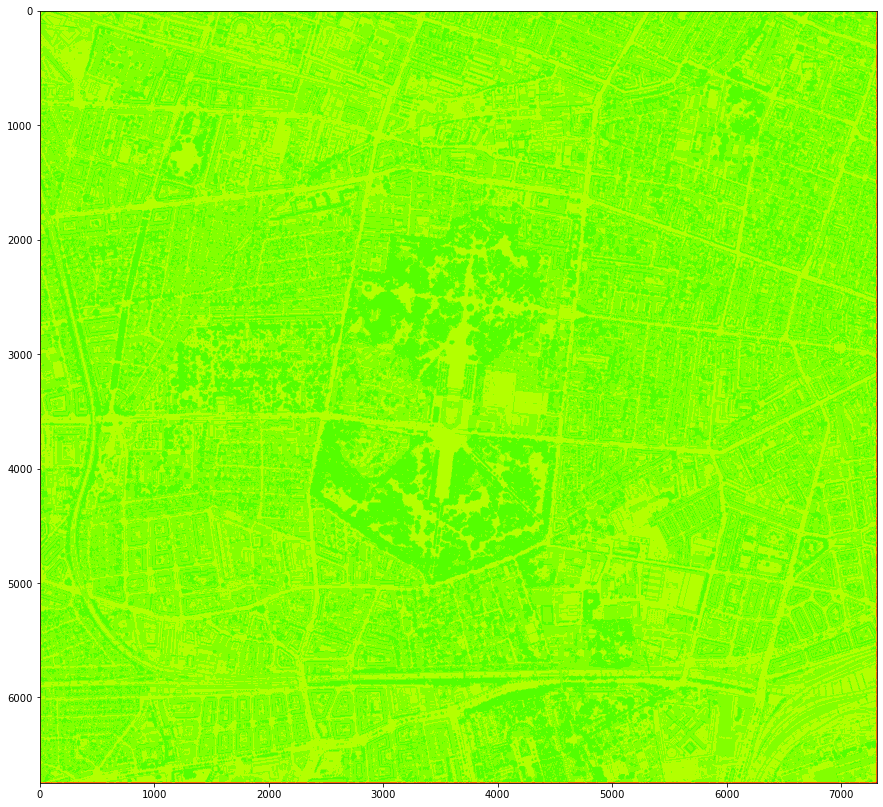

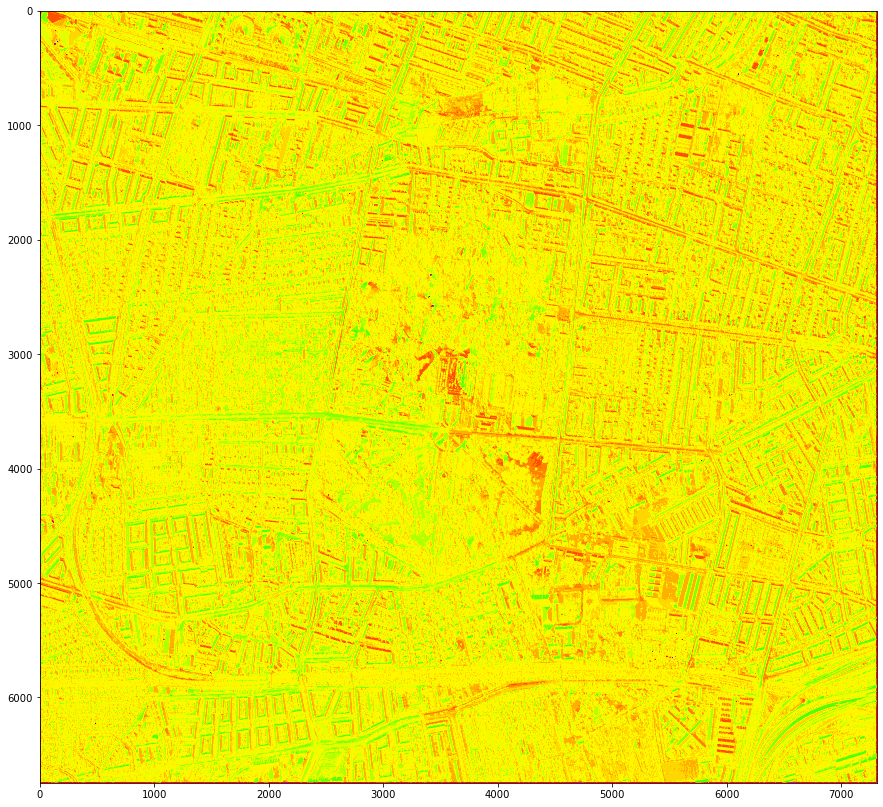

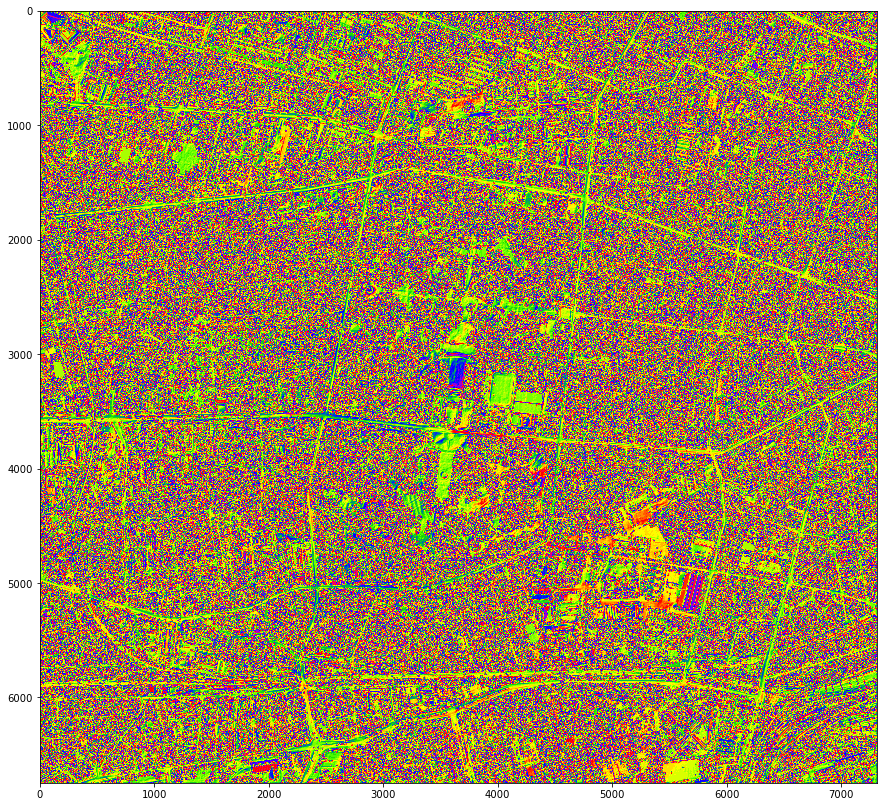

In [16]:
for ds in ['zoo_slope.tif', 'zoo_aspect.tif', 'zoo_hillshade.tif']:
    with rasterio.open(ds) as dataset:
        dem=dataset.read(1)
        plt.figure(figsize=(15, 15))
        imgplot = plt.imshow(dem, cmap='prism') 
        # try hot, prism, gray, more at https://matplotlib.org/stable/tutorials/colors/colormaps.html